In [ ]:
import os

import matplotlib.pyplot as plt

from dr_manhattan.exchanges import Polymarket

In [2]:
config = {
    "private_key": os.getenv("POLYMARKET_PRIVATE_KEY"),
    "funder": os.getenv("POLYMARKET_FUNDER"),
}

exchange = Polymarket(config)
print(f"Polymarket time-series ready ({'authenticated' if exchange.private_key else 'public'})")

Polymarket time-series ready (authenticated)


In [3]:
crypto_tag = exchange.get_tag_by_slug("crypto")
crypto_hourly = exchange.get_tag_by_slug("1H")
crypto_15min = exchange.get_tag_by_slug("15M")
crypto_daily = exchange.get_tag_by_slug("today")
crypto_hit = exchange.get_tag_by_slug("hit-price")
election = exchange.get_tag_by_slug("election")

crypto_15min

Tag(id='102467', label='15M', slug='15M', force_show=None, force_hide=None, is_carousel=None, published_at=None, created_at='2025-08-06T16:02:23.483913Z', updated_at='2025-12-18T03:16:51.839944Z', raw={'id': '102467', 'label': '15M', 'slug': '15M', 'createdAt': '2025-08-06T16:02:23.483913Z', 'updatedAt': '2025-12-18T03:16:51.839944Z', 'requiresTranslation': False})

In [4]:
crypto_markets = exchange.search_markets(
    limit=1000, tag_id=crypto_hourly.id, closed=False, keywords=["bitcoin", "up or down"], log=True
)

crypto_markets[:5]

current-offset: 0
page_limit: 200
----------


[Market(id='972002', question='Bitcoin Up or Down - December 21, 10AM ET', outcomes=['Up', 'Down'], close_time=datetime.datetime(2025, 12, 21, 16, 0, tzinfo=datetime.timezone.utc), volume=0.0, liquidity=0.0, prices={}, metadata={'id': '972002', 'question': 'Bitcoin Up or Down - December 21, 10AM ET', 'conditionId': '0x13db48441e2573deeca1e13db068b1b2c6091775525c7719c7076b13ff988bc6', 'slug': 'bitcoin-up-or-down-december-21-10am-et', 'resolutionSource': 'https://www.binance.com/en/trade/BTC_USDT', 'endDate': '2025-12-21T16:00:00Z', 'liquidity': '0', 'startDate': '2025-12-19T15:01:11.030355Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/BTC+fullsize.png', 'description': 'This market will resolve to "Up" if the close price is greater than or equal to the open price for the BTC/USDT 1 hour candle that begins on the time and date specified in the title. Otherwise, this market will resolve to 

In [5]:
epl_tag = exchange.get_tag_by_slug("EPL")

epl_markets = exchange.search_markets(
    limit=200, tag_id=epl_tag.id, closed=True, keywords=["will", "win on", "chelsea"], log=True
)

epl_markets

current-offset: 0
page_limit: 200
----------


[Market(id='768239', question='Will Chelsea FC win on 2025-12-13?', outcomes=['Yes', 'No'], close_time=datetime.datetime(2025, 12, 13, 15, 0, tzinfo=datetime.timezone.utc), volume=867952.276262, liquidity=0.0, prices={'Yes': 1.0}, metadata={'id': '768239', 'question': 'Will Chelsea FC win on 2025-12-13?', 'conditionId': '0x74aa5a6f8438efffd0c48d30178f609344ff06c2e5c7d95f9e80eb2d310e070a', 'slug': 'epl-che-eve-2025-12-13-che', 'resolutionSource': 'https://www.premierleague.com/', 'endDate': '2025-12-13T15:00:00Z', 'startDate': '2025-11-30T05:12:07.930351Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/Repetitive-markets/premier+league.jpg', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/Repetitive-markets/premier+league.jpg', 'description': 'In the upcoming game, scheduled for December 13, 2025\nIf Chelsea FC wins, this market will resolve to "Yes".\nOtherwise, this market will resolve to "No".\nIf the game is postponed, this market will remain open unti

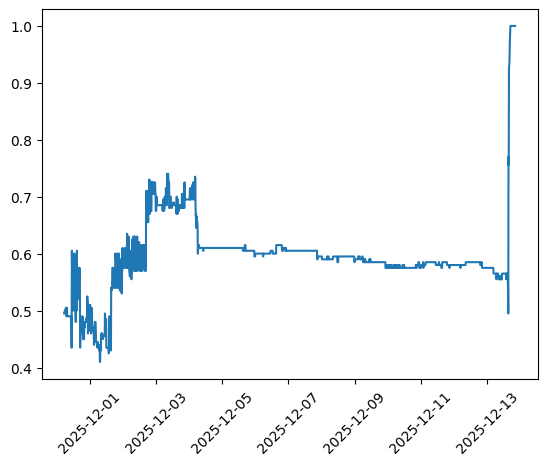

In [6]:
target_market = crypto_markets[0]
target_market = epl_markets[0]

df = exchange.fetch_price_history(target_market, interval="max", fidelity=1, as_dataframe=True)

plt.plot(df["timestamp"], df["price"])
plt.xticks(rotation=45)
plt.show()

current-offset: 0
page_limit: 500
----------
current-offset: 500
page_limit: 500
----------
current-offset: 1000
page_limit: 500
----------
current-offset: 1500
page_limit: 500
----------


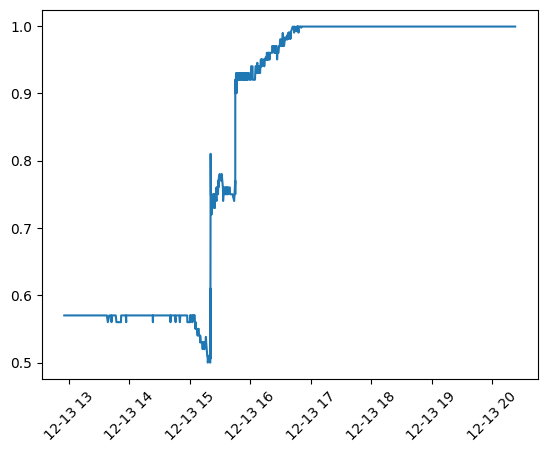

In [7]:
trades = exchange.fetch_public_trades(
    market=target_market, limit=10000, as_dataframe=True, log=True
)

trades.set_index("timestamp")
up_trades = trades[trades["outcome_index"] == 0].set_index("timestamp").sort_index()
down_trades = trades[trades["outcome_index"] == 1].set_index("timestamp").sort_index()
plt.plot(up_trades["price"]["2025-11-29 19":])
plt.xticks(rotation=45)
plt.show()